In [ ]:
import pandas as pd

# List of file names
file_names = ['ProviderInfo_2021.csv', 'ProviderInfo_2020.csv', 'ProviderInfo_2019.csv',
              'ProviderInfo_2018.csv', 'ProviderInfo_2017.csv', 'ProviderInfo_2016.csv', 'ProviderInfo_2015.csv']

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each file and read into a DataFrame
for file_name in file_names:
    # Try different encodings until one works
    for encoding in ['utf-8', 'latin1', 'iso-8859-1']:
        try:
            df = pd.read_csv(file_name, encoding=encoding)
            dfs.append(df)
            break  # Stop trying encodings if successful
        except UnicodeDecodeError:
            print(f"Failed to read {file_name} with encoding {encoding}. Trying another encoding.")

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Write the merged DataFrame to a new CSV file
df.to_csv("merged_data.csv", index=False)

print("Merged data saved to merged_data.csv")


Failed to read ProviderInfo_2021.csv with encoding utf-8. Trying another encoding.
Failed to read ProviderInfo_2020.csv with encoding utf-8. Trying another encoding.
Failed to read ProviderInfo_2018.csv with encoding utf-8. Trying another encoding.
Failed to read ProviderInfo_2017.csv with encoding utf-8. Trying another encoding.
Merged data saved to merged_data.csv


In [ ]:
df.describe()

,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Number of Certified Beds,Average Number of Residents per Day,Average Number of Residents per Day Footnote,Overall Rating,Overall Rating Footnote,Health Inspection Rating,Health Inspection Rating Footnote,...,exp_aide,exp_lpn,exp_rn,exp_total,adj_aide,adj_lpn,adj_rn,adj_total,incident_cnt,cmplnt_cnt
count,30612.000000,3.061200e+04,30612.000000,30612.000000,30477.000000,135.0,30172.000000,440.000000,30172.000000,440.000000,...,46755.000000,46755.000000,46755.000000,46755.000000,45619.000000,45619.000000,45619.000000,45619.000000,46958.000000,46958.000000
mean,50308.328695,5.875271e+09,390.119332,106.456259,75.981537,10.0,3.229352,7.684091,2.814729,7.684091,...,2.431442,0.658080,1.087236,4.176758,2.487192,1.072880,0.572982,4.009509,1.051195,3.762895
std,26843.762022,2.331897e+09,273.507873,60.592516,45.885948,0.0,1.404346,8.313215,1.274761,8.313215,...,0.190566,0.095243,0.234808,0.427284,0.637430,0.475443,0.310123,0.918759,2.798608,6.744268
min,660.000000,1.112223e+09,0.000000,1.000000,1.000000,10.0,1.000000,1.000000,1.000000,1.000000,...,1.213330,0.418180,0.470000,2.180000,0.000000,0.000000,0.014280,1.327720,0.000000,0.000000
25%,29824.000000,3.867528e+09,150.000000,65.000000,45.700000,10.0,2.000000,1.000000,2.000000,1.000000,...,2.330695,0.601720,0.929030,3.927095,2.081795,0.792515,0.381410,3.419880,0.000000,0.000000
50%,48812.000000,6.058896e+09,360.000000,99.000000,69.000000,10.0,3.000000,1.000000,3.000000,1.000000,...,2.448360,0.645310,1.060280,4.172940,2.402390,1.050220,0.509620,3.855810,0.000000,1.000000
75%,72823.000000,8.019699e+09,590.000000,127.000000,94.600000,10.0,5.000000,18.000000,4.000000,18.000000,...,2.553420,0.694655,1.206765,4.407915,2.798195,1.309665,0.684460,4.420505,1.000000,5.000000
max,99929.000000,1.000000e+10,996.000000,1389.000000,727.000000,10.0,5.000000,18.000000,5.000000,18.000000,...,3.344450,1.688820,2.776880,7.516560,10.876350,8.566240,8.515480,15.151870,105.000000,193.000000


In [ ]:
print(df.count())

Federal Provider Number    30612
Provider Name              30612
Provider Address           30612
Provider City              30612
Provider State             30612
                           ...  
CYCLE_3_NUMREVIS           46958
CYCLE_3_REVISIT_SCORE      46958
CYCLE_3_TOTAL_SCORE        46958
incident_cnt               46958
cmplnt_cnt                 46958
Length: 231, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108637 entries, 0 to 108636
Columns: 231 entries, Federal Provider Number to cmplnt_cnt
dtypes: float64(100), object(131)
memory usage: 191.5+ MB


In [ ]:
mask_na = df.isna().sum() /len(df) < 0.6

df = df.loc[ : , mask_na]
df

,PROVNAME,ADDRESS,CITY,STATE,ZIP,PHONE,COUNTY_SSA,OWNERSHIP,BEDCERT,RESTOT,...,cycle_1_nfromcomp,cycle_2_nfromdefs,cycle_2_nfromcomp,cycle_3_nfromdefs,cycle_3_nfromcomp,CYCLE_3_NUMREVIS,CYCLE_3_REVISIT_SCORE,CYCLE_3_TOTAL_SCORE,incident_cnt,cmplnt_cnt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108632,THE MEDICAL RESORT AT SUGAR LAND,1803 WESCOTT AVENUE,SUGAR LAND,TX,77479.0,2.813294e+09,530.0,For profit - Corporation,90.0,3.0,...,.,.,.,.,.,.,.,.,0.0,0.0
108633,CROSSROADS NURSING & REHABILITATION,611 ROSE MARIE BLVD,HEARNE,TX,77859.0,9.792800e+09,878.0,For profit - Individual,80.0,3.0,...,.,.,.,.,.,.,.,.,0.0,0.0
108634,WEST REST HAVEN INC,503 MEADOW DRIVE,WEST,TX,76691.0,2.548265e+09,780.0,For profit - Corporation,120.0,3.0,...,.,.,.,.,.,.,.,.,0.0,0.0
108635,HIGHLAND MEADOWS HEALTH & REHAB,1870 S JOHN KING BLVD,ROCKWALL,TX,75032.0,9.727227e+09,879.0,For profit - Individual,120.0,3.0,...,.,.,.,.,.,.,.,.,0.0,0.0


In [ ]:
print(df.columns)

Index(['PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'PHONE', 'COUNTY_SSA',
       'OWNERSHIP', 'BEDCERT', 'RESTOT', 'CERTIFICATION', 'INHOSP', 'LBN',
       'PARTICIPATION_DATE', 'CCRC_FACIL', 'CHOW_LAST_12MOS',
       'RN_staffing_rating', 'AIDHRD', 'VOCHRD', 'RNHRD', 'TOTLICHRD',
       'TOTHRD', 'PTHRD', 'CYCLE_1_SURVEY_DATE', 'cycle_1_defs',
       'cycle_1_defs_score', 'CYCLE_2_SURVEY_DATE', 'cycle_2_defs',
       'cycle_2_defs_score', 'CYCLE_3_SURVEY_DATE', 'cycle_3_defs',
       'cycle_3_defs_score', 'WEIGHTED_ALL_CYCLES_SCORE', 'FINE_CNT',
       'FINE_TOT', 'PAYDEN_CNT', 'TOT_PENLTY_CNT', 'FILEDATE', 'COUNTY_NAME',
       'SFF', 'OLDSURVEY', 'CYCLE_1_NUMREVIS', 'CYCLE_1_REVISIT_SCORE',
       'CYCLE_1_TOTAL_SCORE', 'CYCLE_2_NUMREVIS', 'CYCLE_2_REVISIT_SCORE',
       'CYCLE_2_TOTAL_SCORE', 'provnum', 'resfamcouncil', 'sprinkler_status',
       'overall_rating', 'survey_rating', 'quality_rating', 'staffing_rating',
       'exp_aide', 'exp_lpn', 'exp_rn', 'exp_total', 'adj_aide

In [ ]:
df_tx = df[df['STATE'] == 'TX']

In [ ]:
df = df.select_dtypes(include=None, exclude='object')
df_tx = df_tx.select_dtypes(include=None, exclude='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108637 entries, 0 to 108636
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP                 78025 non-null  float64
 1   PHONE               78025 non-null  float64
 2   COUNTY_SSA          78025 non-null  float64
 3   BEDCERT             78025 non-null  float64
 4   RESTOT              77437 non-null  float64
 5   RN_staffing_rating  60422 non-null  float64
 6   AIDHRD              75326 non-null  float64
 7   VOCHRD              75326 non-null  float64
 8   RNHRD               75326 non-null  float64
 9   TOTLICHRD           75326 non-null  float64
 10  TOTHRD              75326 non-null  float64
 11  PTHRD               75317 non-null  float64
 12  FINE_CNT            78025 non-null  float64
 13  FINE_TOT            78025 non-null  float64
 14  PAYDEN_CNT          78025 non-null  float64
 15  TOT_PENLTY_CNT      78025 non-null  float64
 16  ov

In [ ]:
df['GoodRating'] = df['overall_rating'] > 3
df_tx['GoodRating'] = df_tx['overall_rating'] > 3

In [ ]:
df['GoodRating']

0         False
1         False
2         False
3         False
4         False
          ...  
108632    False
108633    False
108634    False
108635    False
108636    False
Name: GoodRating, Length: 108637, dtype: bool

In [ ]:
df.isnull()

,ZIP,PHONE,COUNTY_SSA,BEDCERT,RESTOT,RN_staffing_rating,AIDHRD,VOCHRD,RNHRD,TOTLICHRD,...,exp_lpn,exp_rn,exp_total,adj_aide,adj_lpn,adj_rn,adj_total,incident_cnt,cmplnt_cnt,GoodRating
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108632,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
108633,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
108634,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
108635,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False


In [ ]:
df = df.dropna()
df_tx = df_tx.dropna()

In [ ]:
y = df_tx['GoodRating']
X = df_tx.drop(['GoodRating', 'overall_rating', 'survey_rating' , 'quality_rating',
             'staffing_rating', 'RN_staffing_rating', 'ZIP', 'PHONE', 'COUNTY_SSA'], axis = 1)

from sklearn.model_selection import train_test_split

#splits the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 20, stratify=y)

Best model parameters:  {'max_depth': 4, 'min_samples_leaf': 0.01}
accuracy for training set:  0.81
Test set accuracy:  0.8043165467625899


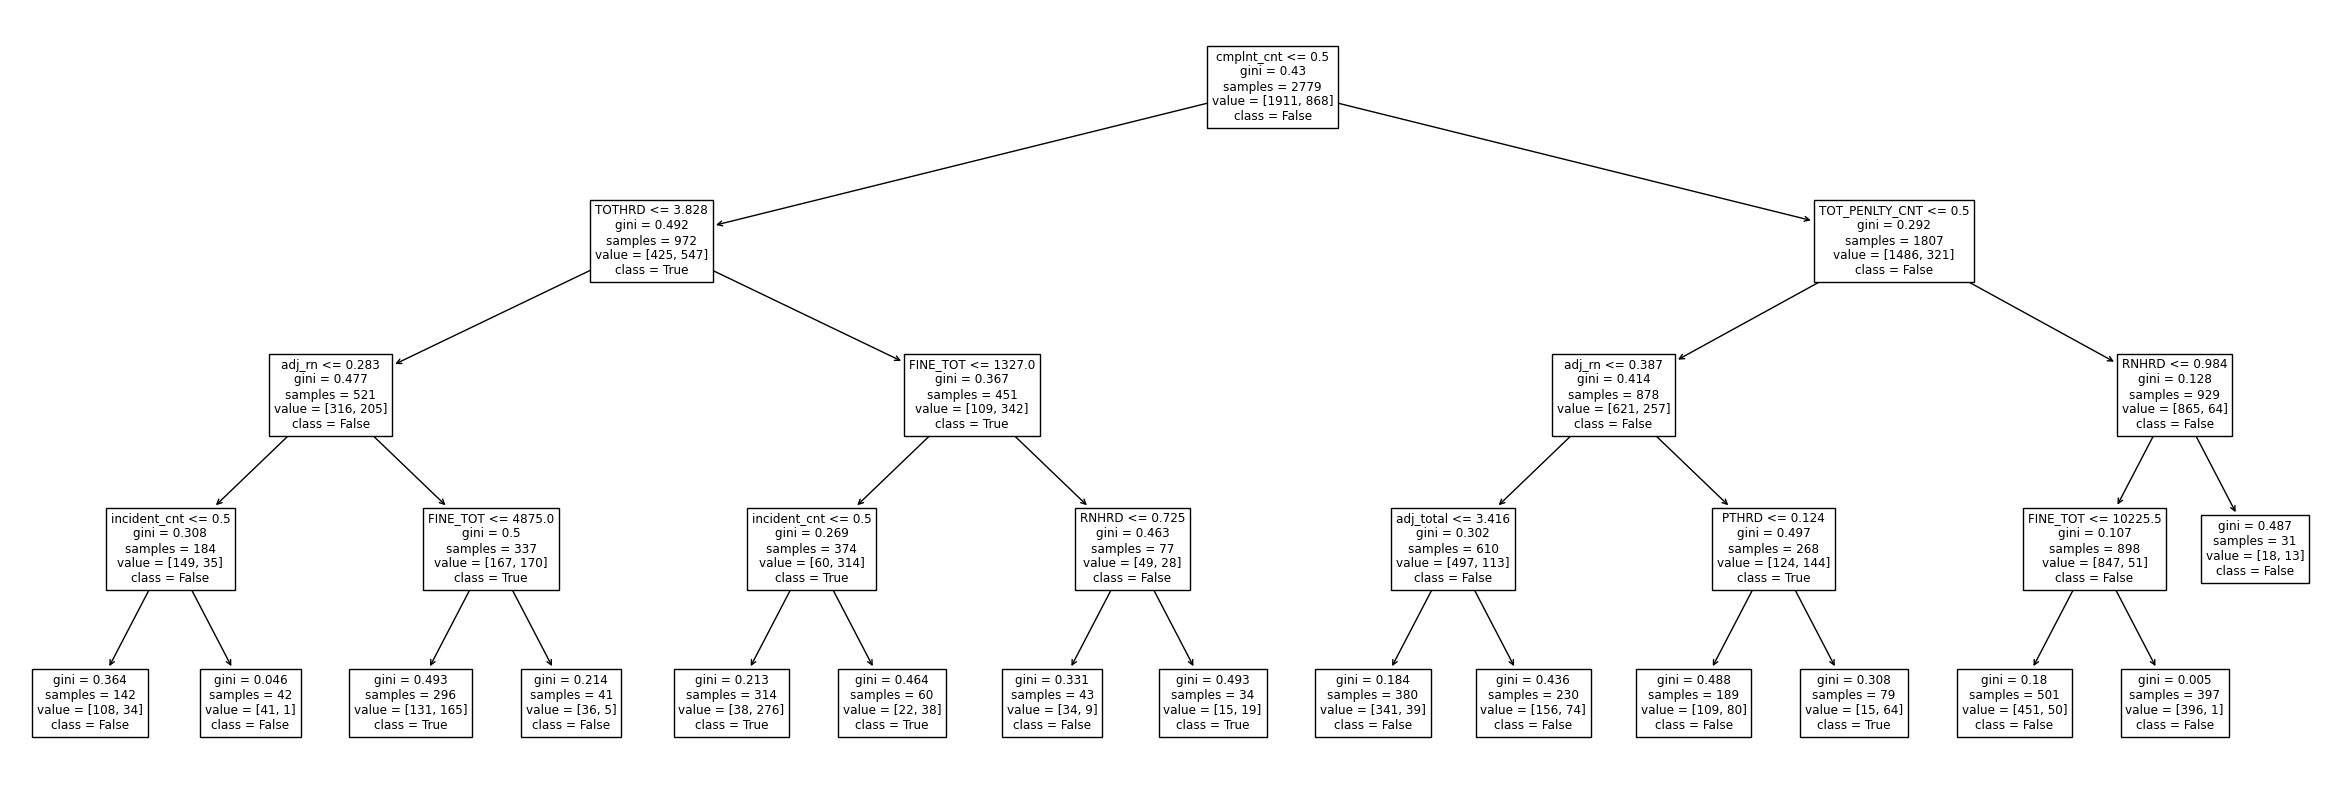

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

dt_params = {'max_depth':[4,5],
             'min_samples_leaf':[0.008,0.009,0.01]}
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, cv = 20)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score
print('Best model parameters: ',dt.best_params_)

print('accuracy for training set: ', dt.score(X_train, y_train).round(2))
# Compute test set accuracy

print("Test set accuracy: ", dt.score(X_test, y_test))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
plot_tree(dt.best_estimator_,feature_names=X_train.columns,class_names=['False','True'])
plt.show()

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.ensemble import RandomForestClassifier

dt_params = {'n_estimators': [50, 70, 100],
                 'max_depth':[4, 5, 6, 7],
                 'min_samples_leaf':[0.008, 0.009, 0.01, 0.011, 0.012]}
# Instantiate a RandomForest
rf = GridSearchCV(RandomForestClassifier(), param_grid=dt_params, cv = 20, n_jobs=-1)

# Fit dt to the training set
rf.fit(X_train, y_train)

# Predict test set labels
y_pred = rf.predict(X_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score
print('Best model parameters: ',rf.best_params_)

print('accuracy for training set: ', rf.score(X_train, y_train).round(2))
# Compute test set accuracy

print("Test set accuracy: ", rf.score(X_test, y_test))

Best model parameters:  {'max_depth': 7, 'min_samples_leaf': 0.012, 'n_estimators': 100}
accuracy for training set:  0.82
Test set accuracy:  0.7913669064748201


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.5844e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.04431e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best parameters:  {'alpha': 10}
Ridge Train R2:  0.249
Ridge Test R2:  0.246


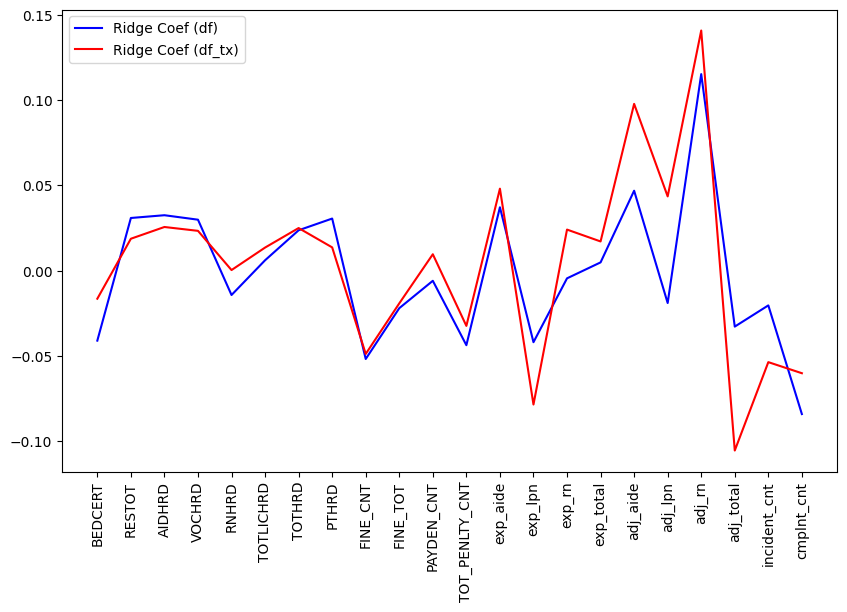

In [ ]:
from sklearn.preprocessing import StandardScaler


y = df_tx['GoodRating']
X = df_tx.drop(['GoodRating', 'overall_rating', 'survey_rating' , 'quality_rating',
             'staffing_rating', 'RN_staffing_rating', 'ZIP', 'PHONE', 'COUNTY_SSA'], axis = 1)

from sklearn.model_selection import train_test_split

#splits the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 20, stratify=y)


SS = StandardScaler()
X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

from sklearn.linear_model import Ridge, Lasso

params = {'alpha': [0.01,0.1,1,0,10]
          }

rg = GridSearchCV(Ridge(),param_grid=params, cv=5)


rg.fit(X_train_scaled,y_train)


y_df = df['GoodRating']
X_df = df.drop(['GoodRating', 'overall_rating', 'survey_rating', 'quality_rating',
                'staffing_rating', 'RN_staffing_rating', 'ZIP', 'PHONE', 'COUNTY_SSA'], axis=1)

# Splitting the data
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=20, stratify=y_df)

# Standardizing the data
SS = StandardScaler()
X_train_scaled_df = SS.fit_transform(X_train_df)
X_test_scaled_df = SS.transform(X_test_df)

# Ridge regression
params = {'alpha': [0.01, 0.1, 1, 10]}  # Removed 0 as it's not valid for alpha

rg_df = GridSearchCV(Ridge(), param_grid=params, cv=5)
rg_df.fit(X_train_scaled_df, y_train_df)

# Printing results
print('Best parameters: ', rg_df.best_params_)
print("Ridge Train R2: ", rg_df.score(X_train_scaled_df, y_train_df).round(3))
print("Ridge Test R2: ", rg_df.score(X_test_scaled_df, y_test_df).round(3))

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.plot(X_df.columns, rg_df.best_estimator_.coef_, label='Ridge Coef (df)', color='blue')
plt.plot(X.columns, rg.best_estimator_.coef_, label='Ridge Coef (df_tx)', color='red')
plt.xticks(rotation=90)
plt.legend()
plt.show()